In [1]:
!pip list


Package                 Version
----------------------- -----------
appnope                 0.1.4
asttokens               3.0.0
attrs                   25.3.0
certifi                 2025.7.14
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
debugpy                 1.8.17
decorator               5.2.1
executing               2.2.1
fonttools               4.60.1
h11                     0.16.0
idna                    3.10
ipykernel               7.1.0
ipython                 9.6.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.9.1
kiwisolver              1.4.9
matplotlib              3.10.7
matplotlib-inline       0.2.1
nest-asyncio            1.6.0
numpy                   2.3.4
outcome                 1.3.0.post0
packaging               25.0
pandas                  2.3.3
parso                   0.8.5
pexpect                 4.9.0
pillow                  12.0.0
pip             

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
# Load the CSV file into a dataframe
df = pd.read_csv('/Users/nagendra_subramanya@optum.com/Library/CloudStorage/OneDrive-Krishna/Nagendra/SelfCode/DatabaseInCSV/DailyLogSummaryForEachDay.csv')

# Display the first few rows of the dataframe
print(df.head())

           Category         ActivityDate  TotalValue
0          SelfHelp  2019-09-26 00:00:00         0.0
1          SelfCode  2019-09-26 00:00:00         0.0
2          SelfTech  2019-09-26 00:00:00         0.0
3          SelfSong  2019-09-26 00:00:00         0.0
4  FitbitDailySteps  2019-09-26 00:00:00     18788.0


In [6]:
# Group by 'Category' and calculate the required statistics
stats_by_category = df.groupby('Category').agg(
    TotalSum=('TotalValue', 'sum'),
    TotalCount=('TotalValue', 'count'),
    Average=('TotalValue', 'mean'),
    Median=('TotalValue', 'median')
).reset_index()

# Round the numerical columns to 2 decimal places
stats_by_category[['TotalSum', 'Average', 'Median']] = stats_by_category[['TotalSum', 'Average', 'Median']].round(2)

# Calculate zero and non-zero entries grouped by 'Category'
zero_scores = df[df['TotalValue'] == 0].groupby('Category').size().reset_index(name='Zeros')
non_zero_scores = df[df['TotalValue'] != 0].groupby('Category').size().reset_index(name='NonZeros')

# Merge zero and non-zero scores with the main stats dataframe
stats_by_category = stats_by_category.merge(zero_scores, on='Category', how='left').merge(non_zero_scores, on='Category', how='left')

# Fill NaN values with 0 for ZeroScores and NonZeroScores
stats_by_category[['Zeros', 'NonZeros']] = stats_by_category[['Zeros', 'NonZeros']].fillna(0).astype(int)

# Calculate zero and non-zero percentages
stats_by_category['ZeroP'] = ((stats_by_category['Zeros'] / stats_by_category['TotalCount']) * 100).round(2)
stats_by_category['NonZeroP'] = ((stats_by_category['NonZeros'] / stats_by_category['TotalCount']) * 100).round(2)

# Display the result
# Use the to_string() method to print the entire dataframe in a single table with all columns in one line
print(stats_by_category.to_string(index=False))



        Category    TotalSum  TotalCount  Average  Median  Zeros  NonZeros  ZeroP  NonZeroP
FitbitDailySteps 35477339.00        3441 10310.18 10345.0     85      3356   2.47     97.53
        SelfCode      311.75        2224     0.14     0.0   1708       516  76.80     23.20
        SelfHelp     1077.25        2224     0.48     0.5    913      1311  41.05     58.95
        SelfSong      115.00        2224     0.05     0.0   1869       355  84.04     15.96
        SelfTech      607.00        2224     0.27     0.0   1387       837  62.37     37.63


In [7]:
df.groupby('Category').describe()

TotalValue                                                   \
                      count          mean          std  min     25%      50%   
Category                                                                       
FitbitDailySteps     3441.0  10310.182796  5710.705289  0.0  6045.0  10345.0   
SelfCode             2224.0      0.140175     0.358756  0.0     0.0      0.0   
SelfHelp             2224.0      0.484375     0.544064  0.0     0.0      0.5   
SelfSong             2224.0      0.051709     0.128669  0.0     0.0      0.0   
SelfTech             2224.0      0.272932     0.445755  0.0     0.0      0.0   

                                      
                       75%       max  
Category                              
FitbitDailySteps  14112.00  40645.00  
SelfCode              0.00      6.50  
SelfHelp              0.75      4.25  
SelfSong              0.00      1.00  
SelfTech              0.50      3.50

In [8]:
# Convert ActivityDate to datetime format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Extract year, quarter, month, and week from ActivityDate
df['Year'] = df['ActivityDate'].dt.year
df['Quarter'] = df['ActivityDate'].dt.to_period('Q').astype(str)
df['Month'] = df['ActivityDate'].dt.strftime('%Y-%b')
df['Week'] = df['ActivityDate'].dt.strftime('%Y-Week%U')

# Group by Category and Year, Quarter, Month, Week to calculate the average TotalValue
yearly_avg = df.groupby(['Category', 'Year'])['TotalValue'].mean().reset_index()
quarterly_avg = df.groupby(['Category', 'Quarter'])['TotalValue'].mean().reset_index()
monthly_avg = df.groupby(['Category', 'Month'])['TotalValue'].mean().reset_index()
weekly_avg = df.groupby(['Category', 'Week'])['TotalValue'].mean().reset_index()

# Find the best year, quarter, month, and week for each category
best_year = yearly_avg.loc[yearly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Year']]
best_quarter = quarterly_avg.loc[quarterly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Quarter']]
best_month = monthly_avg.loc[monthly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Month']]
best_week = weekly_avg.loc[weekly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Week']]

# Merge the results into a single dataframe
best_stats = best_year.merge(best_quarter, on='Category').merge(best_month, on='Category').merge(best_week, on='Category')

# Rename columns for clarity
best_stats.columns = ['Category', 'BestYear', 'BestQuarter', 'BestMonth', 'BestWeek']

# Display the result
print(best_stats.to_string(index=False))


        Category  BestYear BestQuarter BestMonth    BestWeek
FitbitDailySteps      2021      2021Q3  2021-Sep 2021-Week30
        SelfCode      2025      2024Q3  2020-Aug 2020-Week33
        SelfHelp      2022      2022Q2  2020-Sep 2023-Week53
        SelfSong      2024      2024Q3  2024-Aug 2025-Week00
        SelfTech      2023      2024Q3  2020-Aug 2020-Week33


In [9]:

# Group by Category and Year, Quarter, Month, Week to calculate the average TotalValue
yearly_sum = df.groupby(['Category', 'Year'])['TotalValue'].sum().reset_index()
quarterly_sum = df.groupby(['Category', 'Quarter'])['TotalValue'].sum().reset_index()
monthly_sum = df.groupby(['Category', 'Month'])['TotalValue'].sum().reset_index()
weekly_sum = df.groupby(['Category', 'Week'])['TotalValue'].sum().reset_index()



In [10]:
yearly_sum.loc[yearly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Year','TotalValue']]

,Category,Year,TotalValue
5,FitbitDailySteps,2021,4672838.00
16,SelfCode,2025,75.25
20,SelfHelp,2022,236.75
29,SelfSong,2024,48.75
35,SelfTech,2023,156.25


In [11]:
# pip install matplotlib

In [12]:
import matplotlib.pyplot as plt
# the yearlyy_avg has Category year and totalvalue , i want to plot the horizontal bar. the y axis will have year the horizonal bar will show length of total value. 
# i want the total value 
# to be shown on horizontal bar upto two decimal places make sure all the graph comes in single horizontal right next to each other one another

In [13]:
yearly_avg

,Category,Year,TotalValue
0,FitbitDailySteps,2016,9655.228311
1,FitbitDailySteps,2017,10086.715068
2,FitbitDailySteps,2018,8964.473973
3,FitbitDailySteps,2019,9336.956164
4,FitbitDailySteps,2020,9469.724044
5,FitbitDailySteps,2021,12802.295890
6,FitbitDailySteps,2022,9540.432877
7,FitbitDailySteps,2023,10997.742466
8,FitbitDailySteps,2024,10333.136612
9,FitbitDailySteps,2025,11946.840000


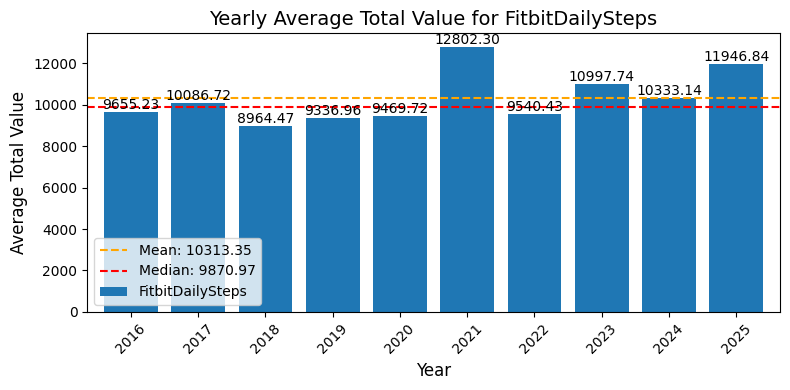

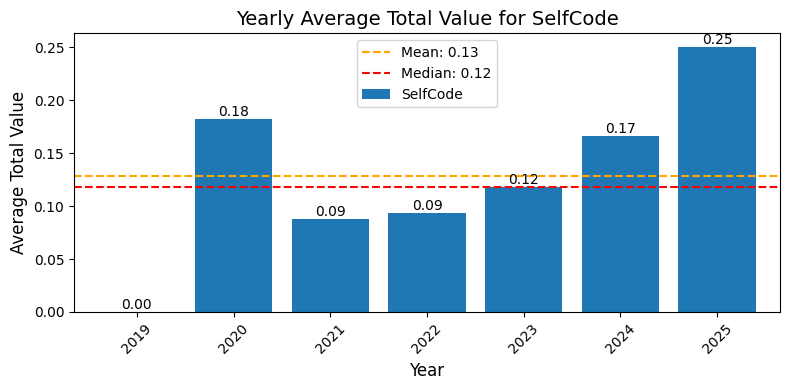

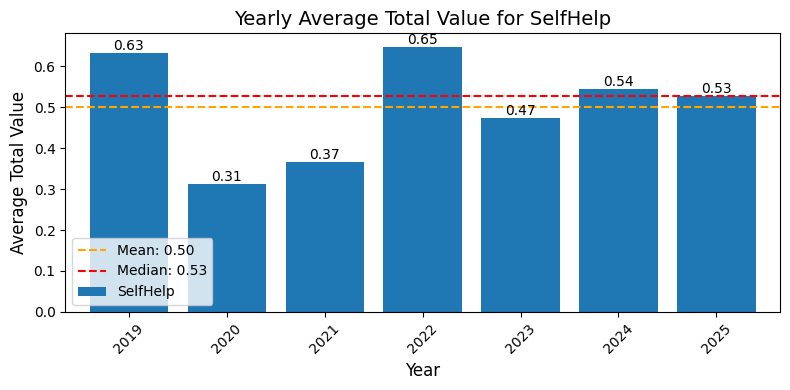

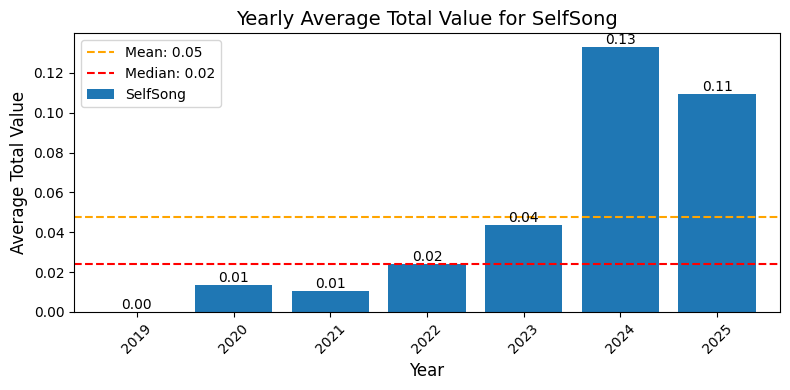

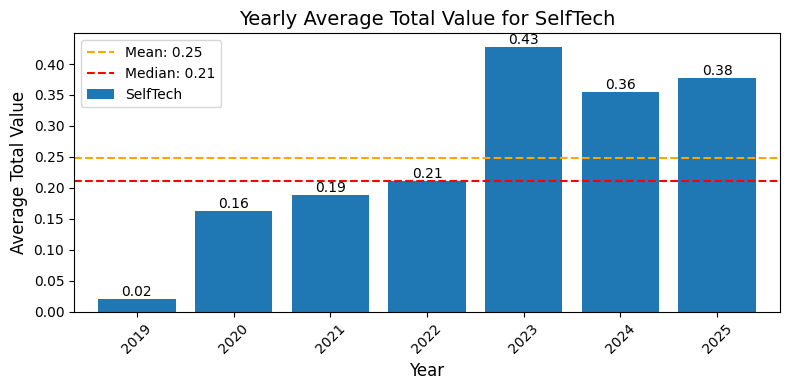

In [17]:
pivot_data = yearly_avg.pivot(index='Year', columns='Category', values='TotalValue')

# Iterate through each category and plot a separate graph
for category in pivot_data.columns:
    plt.figure(figsize=(8, 4))
    ax = pivot_data[category].dropna().plot(kind='bar', width=0.8)

    # Add labels and title
    plt.title(f'Yearly Average Total Value for {category}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Total Value', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()

    # Calculate mean and median for the category
    mean_value = pivot_data[category].mean()
    median_value = pivot_data[category].median()

    # Plot mean as an orange dotted line
    plt.axhline(y=mean_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

    # Plot median as a red dotted line
    plt.axhline(y=median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

    # Add legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.show()


yearly_avg.plot(kind='bar', figsize=(10, 6))